###### Matthew Paul 816018640

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing
from math import sqrt
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score


In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *
# Import `DenseVector`
from pyspark.ml.linalg import DenseVector

# Import `StandardScaler` 
from pyspark.ml.feature import StandardScaler

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [5]:
data=pd.read_csv("complete_features.csv")

In [6]:
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.792,0.764,5,-7.190,1,0.2540,0.10400,0.000000,0.0956,0.531,134.996,008BXU3kzngyZKVSjCyxpE,spotify:track:008BXU3kzngyZKVSjCyxpE,https://api.spotify.com/v1/tracks/008BXU3kzngy...,https://api.spotify.com/v1/audio-analysis/008B...,205111,4
1,0.507,0.574,9,-6.252,0,0.3520,0.26200,0.000000,0.2940,0.856,77.357,00LM9MHgesH1ENYNtEZhDJ,spotify:track:00LM9MHgesH1ENYNtEZhDJ,https://api.spotify.com/v1/tracks/00LM9MHgesH1...,https://api.spotify.com/v1/audio-analysis/00LM...,202147,1
2,0.490,0.923,1,-5.643,1,0.0442,0.00234,0.000000,0.1100,0.518,79.509,010KEn9Flf9Z3WAg6uN2P5,spotify:track:010KEn9Flf9Z3WAg6uN2P5,https://api.spotify.com/v1/tracks/010KEn9Flf9Z...,https://api.spotify.com/v1/audio-analysis/010K...,274013,4
3,0.724,0.486,4,-7.666,0,0.1120,0.11500,0.000002,0.1240,0.124,95.034,01QqtzctZ9v1l6mm1xKo2A,spotify:track:01QqtzctZ9v1l6mm1xKo2A,https://api.spotify.com/v1/tracks/01QqtzctZ9v1...,https://api.spotify.com/v1/audio-analysis/01Qq...,211263,4
4,0.769,0.776,9,-2.996,0,0.1580,0.52100,0.000084,0.1590,0.663,98.083,028S6DVoxhU2WkDdHvpTKR,spotify:track:028S6DVoxhU2WkDdHvpTKR,https://api.spotify.com/v1/tracks/028S6DVoxhU2...,https://api.spotify.com/v1/audio-analysis/028S...,232857,4


In [9]:
columnstokeep=["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms","time_signature"]

In [10]:
newdata=data[columnstokeep]


In [11]:
newdata.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.792,0.764,5,-7.190,1,0.2540,0.10400,0.000000,0.0956,0.531,134.996,205111,4
1,0.507,0.574,9,-6.252,0,0.3520,0.26200,0.000000,0.2940,0.856,77.357,202147,1
2,0.490,0.923,1,-5.643,1,0.0442,0.00234,0.000000,0.1100,0.518,79.509,274013,4
3,0.724,0.486,4,-7.666,0,0.1120,0.11500,0.000002,0.1240,0.124,95.034,211263,4
4,0.769,0.776,9,-2.996,0,0.1580,0.52100,0.000084,0.1590,0.663,98.083,232857,4


In [13]:
scaler = preprocessing.StandardScaler().fit(newdata)

In [16]:
scaled_Data = scaler.transform(newdata)

In [17]:
scaled_Data

array([[ 0.92616542,  0.67322583, -0.0912454 , ...,  0.47337487,
        -0.10741331,  0.14981867],
       [-0.92456915, -0.30456426,  1.01835963, ..., -1.54273169,
        -0.14315545, -9.04453653],
       [-1.03496384,  1.49148174, -1.20085043, ..., -1.46745868,
         0.72345867,  0.14981867],
       ...,
       [ 0.34172292,  1.23931483,  0.74095837, ..., -0.26193616,
         0.09192988,  0.14981867],
       [-0.8661249 , -1.31837819,  0.46355711, ..., -1.10770823,
         0.63277687,  0.14981867],
       [-1.65187537, -1.54996005,  0.46355711, ..., -0.92249884,
         0.46664347,  0.14981867]])

###### Due to size of Dataframe, Finding the optimal number of clusters takes upwards of 2hrs

In [18]:
df_scores = []

k_range = np.arange(2, 10)
for i in k_range:
    
    kmeans = KMeans(n_clusters=i,
                    random_state=1234,
                    )
    labels = kmeans.fit_predict(scaled_Data)
    
    silhouette = silhouette_score(scaled_Data, labels)
    ch = calinski_harabasz_score(scaled_Data, labels)
    db = davies_bouldin_score(scaled_Data, labels)
    tmp_scores = {"n_clusters": i,
                  "distortion": kmeans.inertia_,
                  "silhouette_score": silhouette,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db
                  }
    df_scores.append(tmp_scores)

df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

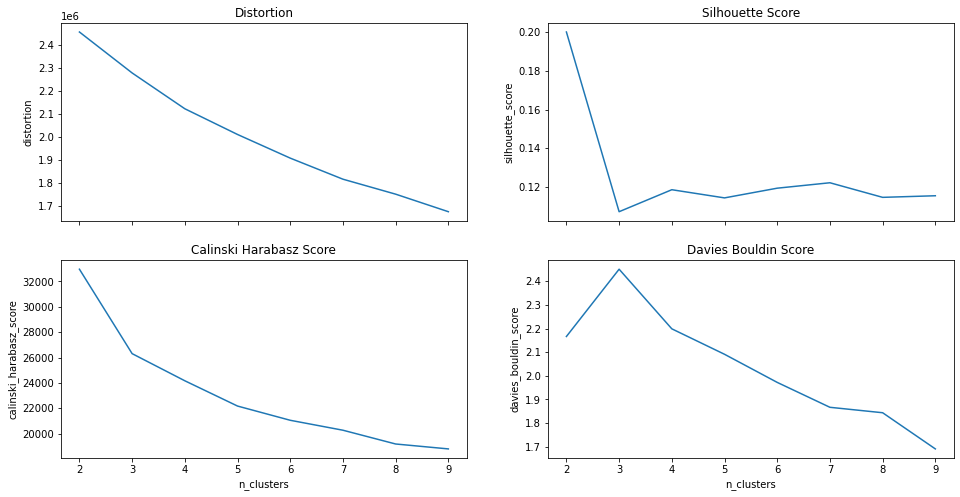

In [19]:
fig, axs = plt.subplots(2,2, sharex=True, figsize=(16,8))
sns.lineplot(data=df_scores, x=df_scores.index, y="distortion", ax=axs[0][0])
axs[0][0].set_title('Distortion')
sns.lineplot(data=df_scores, x=df_scores.index, y="silhouette_score", ax=axs[0][1])
axs[0][1].set_title('Silhouette Score')
sns.lineplot(data=df_scores, x=df_scores.index, y="calinski_harabasz_score", ax=axs[1][0])
axs[1][0].set_title('Calinski Harabasz Score')
sns.lineplot(data=df_scores, x=df_scores.index, y="davies_bouldin_score", ax=axs[1][1])
axs[1][1].set_title('Davies Bouldin Score')
plt.show()

In [20]:
kmeans = KMeans(n_clusters=3,
                random_state=1234,
                )
labels = kmeans.fit_predict(scaled_Data)
print(labels)
print(kmeans.cluster_centers_)
print(kmeans.n_features_in_)

[1 2 1 ... 2 0 0]
[[-0.78957941 -1.35476965 -0.04961243 -1.14121597  0.25482076 -0.42006871
   1.31158698  0.419406   -0.17150902 -0.76714491 -0.19309566  0.24616927
  -0.43047888]
 [ 0.15242522  0.36486648 -0.15545215  0.31436515  0.88053862  0.05786099
  -0.36614814 -0.10558664  0.07050977  0.20161416  0.06902255 -0.049792
   0.10365023]
 [ 0.2447243   0.3024568   0.20294201  0.24680965 -1.13566854  0.15660119
  -0.27814138 -0.10200763  0.01065015  0.17694275  0.02376733 -0.07371839
   0.11006989]]
13


In [25]:
km_df = pd.DataFrame(scaled_Data, columns=columnstokeep)
km_df['cluster'] = labels.tolist()
km_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.926165,0.673226,-0.091245,0.053348,0.880539,1.153509,-0.651539,-0.275333,-0.585755,0.134406,0.473375,-0.107413,0.149819,1
1,-0.924569,-0.304564,1.018360,0.333677,-1.135669,1.980956,-0.075563,-0.275333,0.800887,1.535180,-1.542732,-0.143155,-9.044537,2
2,-1.034964,1.491482,-1.200850,0.515682,0.880539,-0.617904,-1.022132,-0.275333,-0.485112,0.078375,-1.467459,0.723459,0.149819,1
3,0.484587,-0.757435,-0.368647,-0.088908,-1.135669,-0.045445,-0.611439,-0.275320,-0.387264,-1.619794,-0.924423,-0.033228,0.149819,2
4,0.776808,0.734981,1.018360,1.306759,-1.135669,0.342948,0.868600,-0.274853,-0.142645,0.703336,-0.817774,0.227169,0.149819,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217674,-1.515505,-2.002831,1.573162,-0.415560,0.880539,-0.710780,2.406966,-0.271626,-0.513068,-1.025004,-0.434029,0.824161,0.149819,0
217675,-0.099856,0.853345,0.186156,-0.517471,-1.135669,-0.624658,0.168680,4.490625,-0.527047,-0.318152,0.217684,0.870575,0.149819,2
217676,0.341723,1.239315,0.740958,-0.428710,-1.135669,-0.697271,0.416568,-0.004294,-0.600432,1.203305,-0.261936,0.091930,0.149819,2
217677,-0.866125,-1.318378,0.463557,-0.418250,-1.135669,-0.715002,0.318142,-0.275333,-0.559895,-0.339702,-1.107708,0.632777,0.149819,0


In [95]:
km_df.to_csv('Clustered_dataframe.csv', index=False)

In [27]:
new_scaler=preprocessing.StandardScaler().fit(km_df)

In [30]:
new_scaled_Data = scaler.transform(km_df[columnstokeep])

In [50]:
new_scaled_Data

array([[  1.79740952,   0.20607802,  -1.50356327, ...,  -4.23197996,
         -2.58079685, -11.65015957],
       [-10.22090077,  -4.82588753,  -1.19575744, ...,  -4.30249967,
         -2.58079728, -39.82888205],
       [-10.93778244,   4.41703866,  -1.8113691 , ...,  -4.29986676,
         -2.58078683, -11.65015957],
       ...,
       [ -1.99784636,   3.11932123,  -1.2727089 , ...,  -4.25769979,
         -2.58079444, -11.65015957],
       [ -9.84137518, -10.04324128,  -1.34966036, ...,  -4.28728335,
         -2.58078792, -11.65015957],
       [-14.94388587, -11.23502259,  -1.34966036, ...,  -4.28080507,
         -2.58078993, -11.65015957]])

###### 2 Feature Clustering

In [33]:
pca = PCA(n_components=2)
pca_Data = pca.fit_transform(new_scaled_Data)

In [39]:
kmeans = KMeans(n_clusters=3,
                random_state=1234,
                )
labels = kmeans.fit_predict(pca_Data)
print(labels)
print(kmeans.cluster_centers_)
print(kmeans.n_features_in_)

[0 0 2 ... 2 2 2]
[[12.90849441 -2.10859187]
 [-0.86919894 13.12714798]
 [-4.42047347 -2.40978156]]
2


In [40]:
new_km_df = pd.DataFrame(pca_Data, columns=['f1','f2'])
new_km_df['cluster'] = labels.tolist()
new_km_df

,f1,f2,cluster
0,11.591447,-4.539138,0
1,12.642606,6.737723,0
2,-5.694790,0.580180,2
3,-0.313297,-4.130148,2
4,5.430003,-1.651305,0
...,...,...,...
217674,-11.950774,-3.545577,2
217675,-9.047725,-2.998519,2
217676,-3.017213,-3.182235,2
217677,-8.666299,-3.660413,2


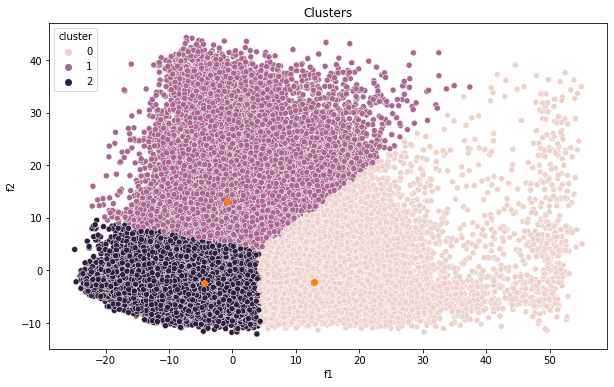

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=new_km_df, x="f1", y="f2", hue="cluster")
plt.scatter( * kmeans.cluster_centers_.T )
plt.title('Clusters')
plt.show()

In [91]:
from functions import *

###### Plotting the parallel coordinates also takes a while, with execution being upwards of 1 1/2 hours

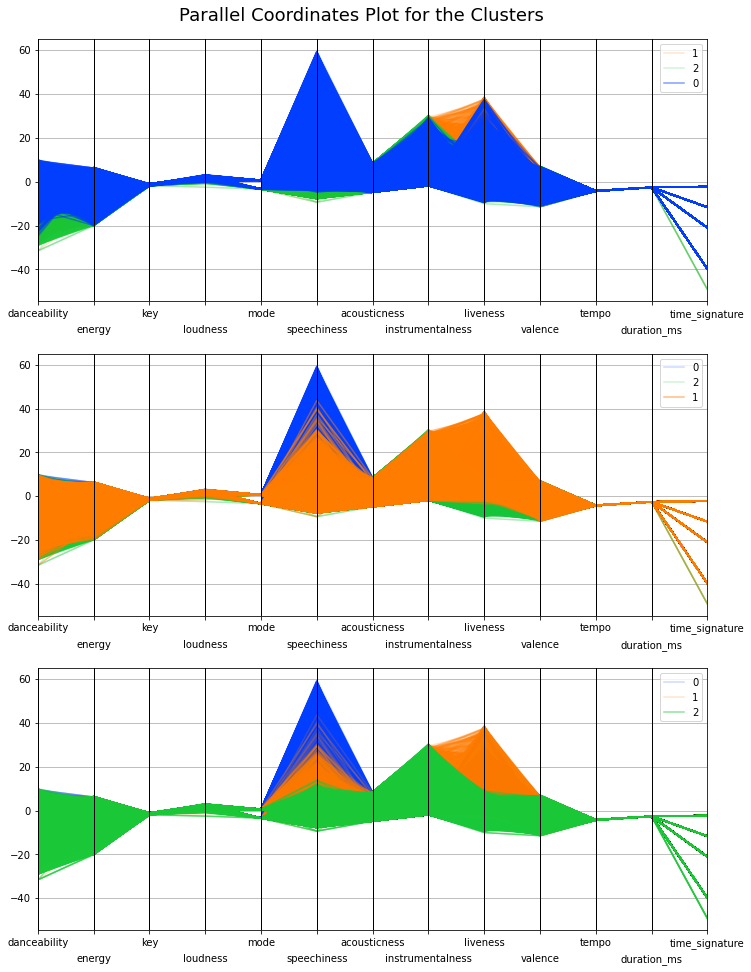

In [92]:
X_clustered = pd.DataFrame(new_scaled_Data, index=km_df.index, columns=columnstokeep)
X_clustered["cluster"] = labels
display_parallel_coordinates(X_clustered, 3)

In [99]:
kmeans_all = KMeans(n_clusters=3,
                random_state=1234,
                )
labels = kmeans_all.fit_predict(scaled_Data)
print(labels)
print(kmeans_all.cluster_centers_)
print(kmeans_all.n_features_in_)

[1 2 1 ... 2 0 0]
[[-0.78957941 -1.35476965 -0.04961243 -1.14121597  0.25482076 -0.42006871
   1.31158698  0.419406   -0.17150902 -0.76714491 -0.19309566  0.24616927
  -0.43047888]
 [ 0.15242522  0.36486648 -0.15545215  0.31436515  0.88053862  0.05786099
  -0.36614814 -0.10558664  0.07050977  0.20161416  0.06902255 -0.049792
   0.10365023]
 [ 0.2447243   0.3024568   0.20294201  0.24680965 -1.13566854  0.15660119
  -0.27814138 -0.10200763  0.01065015  0.17694275  0.02376733 -0.07371839
   0.11006989]]
13


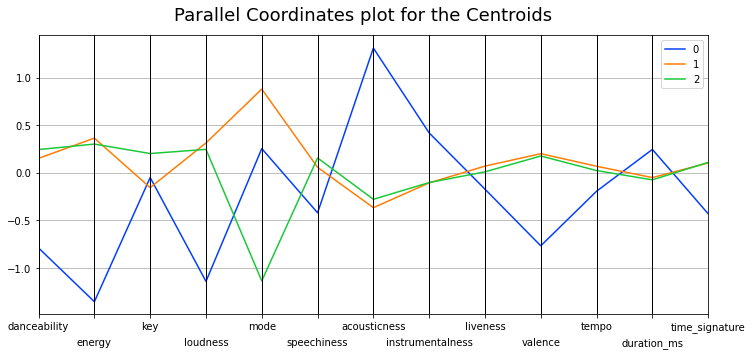

In [100]:
# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans_all.cluster_centers_, columns=columnstokeep)
centroids['cluster'] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

In [42]:
from joblib import dump, load

In [43]:
dump(kmeans, 'kmeans.joblib') 

['kmeans.joblib']

###### 3 Feature Clustering

In [67]:
pca_3 = PCA(n_components=3)
pca_Data_3 = pca_3.fit_transform(new_scaled_Data)

In [68]:
pca_Data_3

array([[ 11.59144727,  -4.53913849,  -1.51467369],
       [ 12.6426058 ,   6.7377235 ,  11.19800479],
       [ -5.69478953,   0.58017993,  -3.10120157],
       ...,
       [ -3.01721335,  -3.18223453,  -8.18359222],
       [ -8.66629879,  -3.66041344,   3.92141213],
       [-12.9551287 ,  -2.89695846,  11.49101657]])

In [69]:
kmeans_3 = KMeans(n_clusters=3,
                random_state=1234,
                )
labels_3 = kmeans_3.fit_predict(pca_Data_3)
print(labels_3)
print(kmeans_3.cluster_centers_)
print(kmeans_3.n_features_in_)

[2 2 0 ... 0 1 1]
[[-0.86956874  0.27103996 -4.62201609]
 [-8.62679911 -0.25533779  6.14464222]
 [14.36305342 -0.4118683   4.55162857]]
3


In [72]:
new_km_df_3 = pd.DataFrame(pca_Data_3, columns=['f1','f2','f3'])
new_km_df_3['cluster'] = labels.tolist()
new_km_df_3

,f1,f2,f3,cluster
0,11.591447,-4.539138,-1.514674,0
1,12.642606,6.737723,11.198005,0
2,-5.694790,0.580180,-3.101202,2
3,-0.313297,-4.130148,1.267910,2
4,5.430003,-1.651305,-3.926917,0
...,...,...,...,...
217674,-11.950774,-3.545577,10.954674,2
217675,-9.047725,-2.998519,2.685094,2
217676,-3.017213,-3.182235,-8.183592,2
217677,-8.666299,-3.660413,3.921412,2


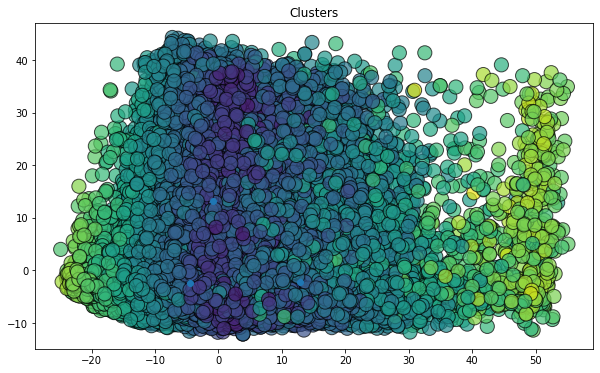

In [85]:
plt.figure(figsize=(10,6))
#sns.scatterplot(data=new_km_df_3, x="f1", y="f2", hue="cluster")
plt.scatter(x=new_km_df_3['f1'],y=new_km_df_3['f2'],linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=new_km_df_3['f3'])
plt.scatter( * kmeans.cluster_centers_.T )
plt.title('Clusters')
plt.show()

In [93]:
dump(kmeans_3, 'kmeans_3_features.joblib') 

['kmeans_3_features.joblib']